<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


### Task 1: Familiarize yourself with the dataset

In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

In [3]:
boston_df.info(), boston_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


(None,
        Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
 std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
 min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
 25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
 50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
 75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
 max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   
 
                RM         AGE         DIS         RAD         TAX     PTRATIO  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
 std   

### Task 2: Generate Descriptive Statistics and Visualizations

In [4]:
# Set global plot style
sns.set(style="whitegrid")

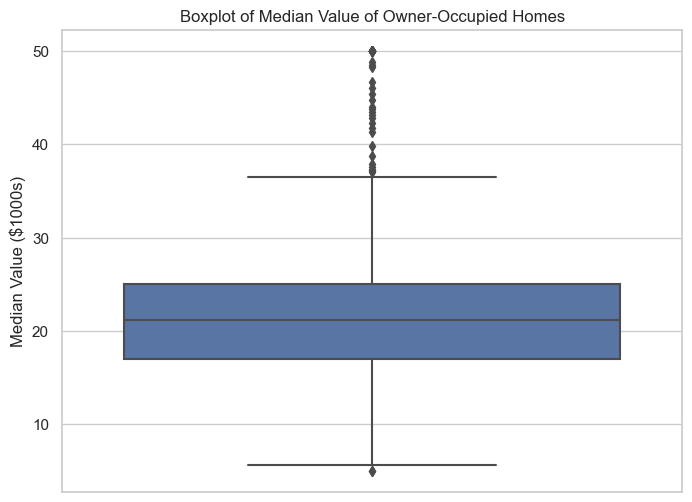

In [5]:
# 1. Boxplot for the "Median value of owner-occupied homes"
pyplot.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value ($1000s)')
pyplot.show()

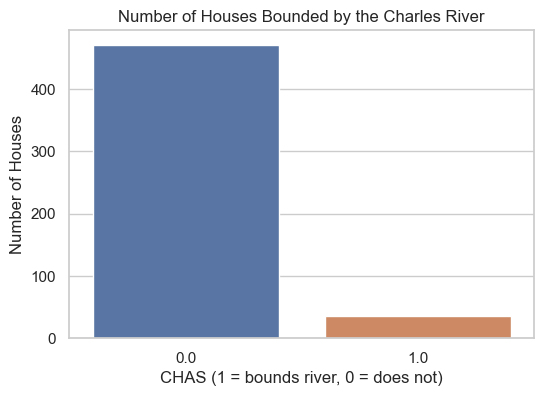

In [6]:
# 2. Bar plot for the Charles River variable (CHAS)
pyplot.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Number of Houses Bounded by the Charles River')
pyplot.xlabel('CHAS (1 = bounds river, 0 = does not)')
pyplot.ylabel('Number of Houses')
pyplot.show()

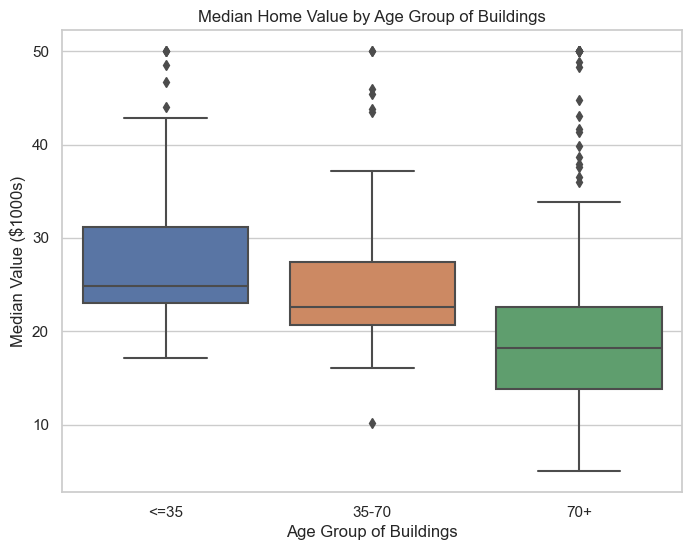

In [7]:
# 3. Boxplot for MEDV vs discretized AGE groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '70+'])

pyplot.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
pyplot.title('Median Home Value by Age Group of Buildings')
pyplot.xlabel('Age Group of Buildings')
pyplot.ylabel('Median Value ($1000s)')
pyplot.show()

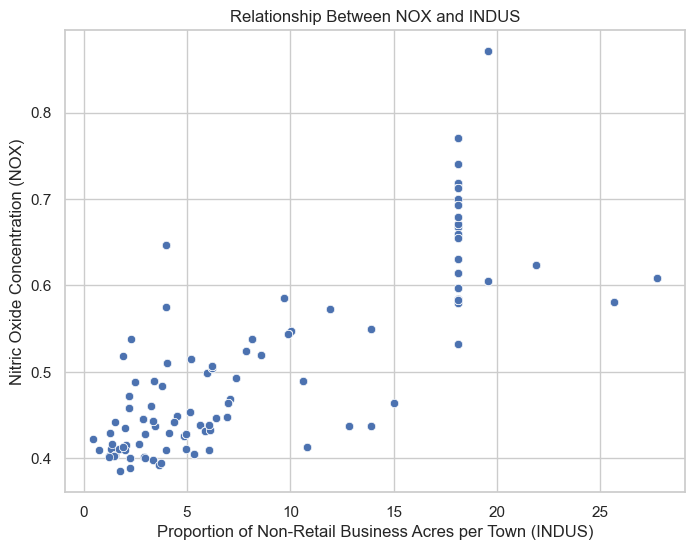

In [8]:
# 4. Scatter plot: NOX vs INDUS
pyplot.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Relationship Between NOX and INDUS')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (NOX)')
pyplot.show()

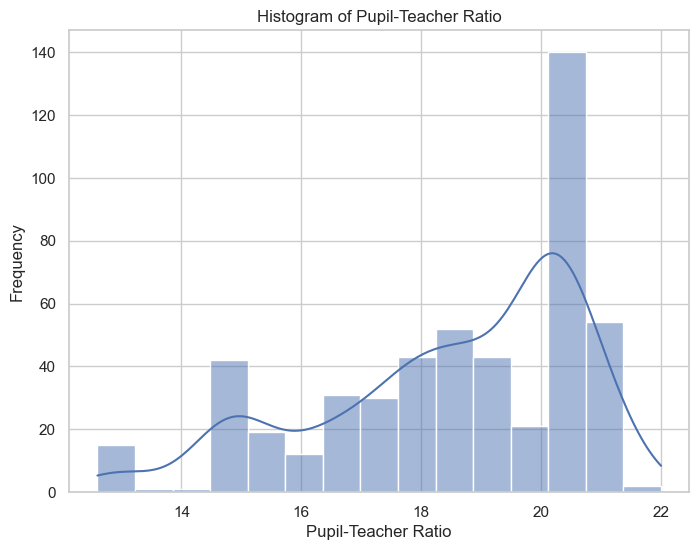

In [9]:
# 5. Histogram for PTRATIO
pyplot.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
pyplot.title('Histogram of Pupil-Teacher Ratio')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

#### Task 3: Statistical Tests

In [13]:
from scipy import stats

# 1. T-test: MEDV difference based on CHAS
group_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
group_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_val_t = stats.ttest_ind(group_0, group_1)

In [12]:
# 2. ANOVA: Difference in MEDV based on discretized AGE group
model_anova = ols('MEDV ~ AGE_group', data=boston_df).fit()
anova_result = sm.stats.anova_lm(model_anova, typ=2)

In [14]:
# 3. Pearson Correlation: NOX vs INDUS
corr_r, corr_p = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

In [15]:
# 4. Regression: Effect of DIS on MEDV
reg_model = ols('MEDV ~ DIS', data=boston_df).fit()
reg_summary = reg_model.summary()

In [16]:
# Return cleaned results
{
    "T-test (CHAS vs MEDV)": {
        "t-statistic": round(t_stat, 3),
        "p-value": round(p_val_t, 5),
        "Significant at α=0.05": p_val_t < 0.05
    },
    "ANOVA (AGE_group vs MEDV)": {
        "F-statistic": round(anova_result['F'][0], 3),
        "p-value": round(anova_result["PR(>F)"][0], 5),
        "Significant at α=0.05": anova_result["PR(>F)"][0] < 0.05
    },
    "Pearson Correlation (NOX vs INDUS)": {
        "Correlation coefficient": round(corr_r, 3),
        "p-value": round(corr_p, 5),
        "Significant at α=0.05": corr_p < 0.05
    },
    "Regression (DIS vs MEDV)": str(reg_summary).split('\n')[0:10]  # show first 10 lines of summary
}

{'T-test (CHAS vs MEDV)': {'t-statistic': -3.996,
  'p-value': 7e-05,
  'Significant at α=0.05': True},
 'ANOVA (AGE_group vs MEDV)': {'F-statistic': 36.408,
  'p-value': 0.0,
  'Significant at α=0.05': True},
 'Pearson Correlation (NOX vs INDUS)': {'Correlation coefficient': 0.764,
  'p-value': 0.0,
  'Significant at α=0.05': True},
 'Regression (DIS vs MEDV)': ['                            OLS Regression Results                            ',
  '==============================================================================',
  'Dep. Variable:                   MEDV   R-squared:                       0.062',
  'Model:                            OLS   Adj. R-squared:                  0.061',
  'Method:                 Least Squares   F-statistic:                     33.58',
  'Date:                Mon, 19 May 2025   Prob (F-statistic):           1.21e-08',
  'Time:                        15:41:07   Log-Likelihood:                -1823.9',
  'No. Observations:                 506   AIC: 

### 1. T-test: Does proximity to the Charles River affect home value?
- **Null Hypothesis (H₀):** There is no difference in median value (MEDV) between homes near the river (CHAS = 1) and those not near (CHAS = 0).
- **t-statistic:** -3.996
- **p-value:** 0.00007
- ✅ **Conclusion:** Since p < 0.05, we reject the null hypothesis. There is a significant difference in median home value based on proximity to the Charles River.

### 2. ANOVA: Does housing age group affect median value?
- **Null Hypothesis (H₀):** The mean MEDV is the same across all AGE groups.
- **F-statistic:** 36.408
- **p-value:** 0.00000
- ✅ **Conclusion:** Since p < 0.05, we reject the null hypothesis. There is a significant difference in house prices based on the age group of the buildings.

### 3. Pearson Correlation: Is there a relationship between NOX and INDUS?
- **Null Hypothesis (H₀):** There is no correlation between NOX (air pollution) and INDUS (industrial zone proportion).
- **Correlation coefficient (r):** 0.764
- **p-value:** 0.00000
- ✅ **Conclusion:** Since p < 0.05, we reject the null hypothesis. There is a strong positive correlation between NOX and INDUS.

### 4. Regression: Does distance from employment centers (DIS) impact median value?
- **Null Hypothesis (H₀):** The coefficient of DIS is 0 (i.e., DIS has no effect on MEDV).
- **R-squared:** 0.062
- **F-statistic:** 33.58
- **p-value:** 1.21e-08
- ✅ **Conclusion:** Since p < 0.05, we reject the null hypothesis. Distance from employment centers does impact house prices, but with low explanatory power (only 6.2% of variation explained).